In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
dfn=pd.read_csv('INNHotelsGroup_newdata.csv')
dfp=pd.read_csv('INNHotelsGroup_pastdata.csv')

In [3]:
dfp.shape

(27093, 12)

In [4]:
dfp

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No
...,...,...,...,...,...,...,...,...,...,...,...,...
27088,INNHG_128122,113,Offline,0,85.00,2,1,2022-06-30,0,3,Canceled,Yes
27089,INNHG_128123,11,Online,1,139.00,2,0,2022-06-30,0,3,Canceled,No
27090,INNHG_128124,35,Online,0,117.90,2,0,2022-06-30,0,3,Canceled,No
27091,INNHG_128125,68,Online,1,131.40,2,0,2022-06-30,0,2,Canceled,No


In [5]:
dfn.shape

(3583, 11)

In [6]:
dfp.dtypes

booking_id                     object
lead_time                       int64
market_segment_type            object
no_of_special_requests          int64
avg_price_per_room            float64
no_of_adults                    int64
no_of_weekend_nights            int64
arrival_date                   object
required_car_parking_space      int64
no_of_week_nights               int64
booking_status                 object
rebooked                       object
dtype: object

In [7]:
dfn.dtypes

booking_id                     object
lead_time                       int64
market_segment_type            object
no_of_special_requests          int64
avg_price_per_room            float64
no_of_adults                    int64
no_of_weekend_nights            int64
arrival_date                   object
required_car_parking_space      int64
no_of_week_nights               int64
booking_status                 object
dtype: object

# Descriptive statistics


In [8]:
dfp.describe()

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights
count,27093.000000,27093.000000,27093.000000,27093.000000,27093.000000,27093.000000,27093.000000
mean,81.605249,0.556454,101.025910,1.825822,0.778319,0.028864,2.171373
std,84.901428,0.743715,34.557289,0.512182,0.861787,0.167426,1.386023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,79.000000,2.000000,0.000000,0.000000,1.000000
50%,55.000000,0.000000,97.000000,2.000000,1.000000,0.000000,2.000000
75%,118.000000,1.000000,119.000000,2.000000,1.000000,0.000000,3.000000
max,443.000000,5.000000,540.000000,4.000000,6.000000,1.000000,17.000000


<Axes: >

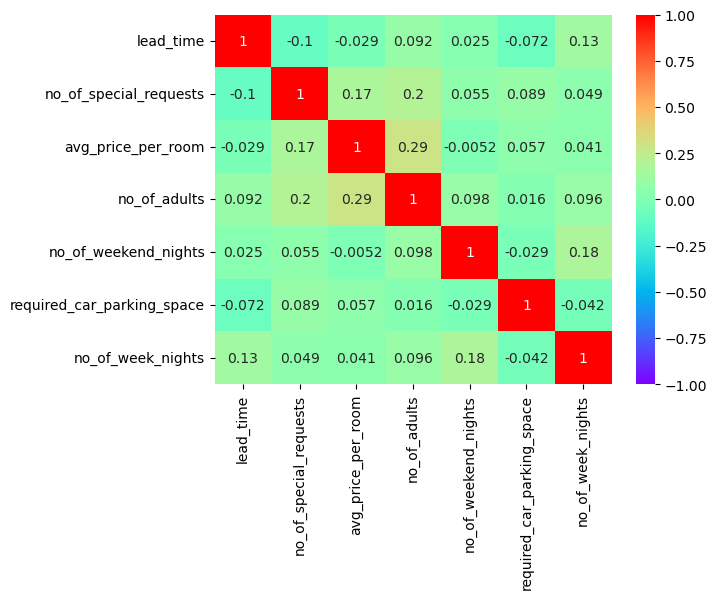

In [9]:
# correlation plot
sns.heatmap(dfp.corr(numeric_only=True),vmax=1,vmin=-1,annot=True,cmap='rainbow')

# Data visulization and Data preprocessing

In [10]:
# what % of cancelled booking was rebooked?
rebooked=dfp[dfp['booking_status']=='Canceled']['rebooked']
rebooked

4         No
12        No
16        No
17        No
22        No
        ... 
27088    Yes
27089     No
27090     No
27091     No
27092     No
Name: rebooked, Length: 8857, dtype: object

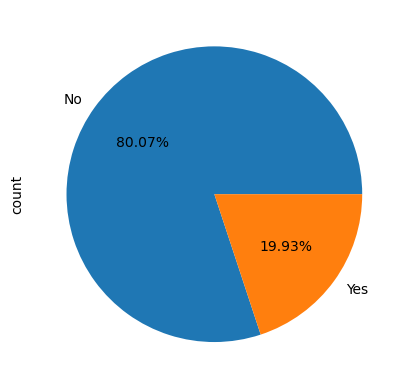

In [11]:
rebooked.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

<Axes: ylabel='count'>

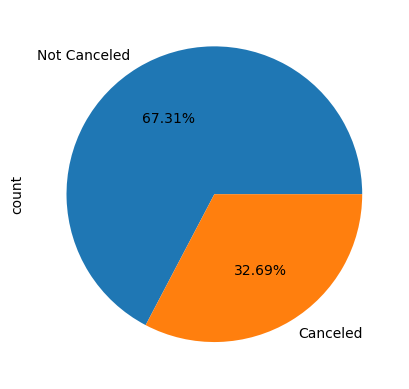

In [12]:

dfp['booking_status'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [13]:
# Now we dont rebboking column for our analysis so we drop it
dfp.drop(columns='rebooked',inplace=True)

In [14]:
# past data has to be used as training set and new data as test set
# for now we will store ytest in separate variable for doing validation later on
# we also need to combine train and test over here in order to preprocess

In [15]:
ytest=dfn['booking_status']
dfn.drop(columns='booking_status',inplace=True)

In [16]:
df=pd.concat([dfp,dfn],axis=0)

In [17]:
df.shape

(30676, 11)

In [18]:
df.isnull().sum()

booking_id                       0
lead_time                        0
market_segment_type              0
no_of_special_requests           0
avg_price_per_room               0
no_of_adults                     0
no_of_weekend_nights             0
arrival_date                     0
required_car_parking_space       0
no_of_week_nights                0
booking_status                3583
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30676 entries, 0 to 3582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  30676 non-null  object 
 1   lead_time                   30676 non-null  int64  
 2   market_segment_type         30676 non-null  object 
 3   no_of_special_requests      30676 non-null  int64  
 4   avg_price_per_room          30676 non-null  float64
 5   no_of_adults                30676 non-null  int64  
 6   no_of_weekend_nights        30676 non-null  int64  
 7   arrival_date                30676 non-null  object 
 8   required_car_parking_space  30676 non-null  int64  
 9   no_of_week_nights           30676 non-null  int64  
 10  booking_status              27093 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 2.8+ MB


In [20]:
df['arrival_date']=pd.to_datetime(df['arrival_date'],format='%Y-%m-%d')

In [21]:
df['arrival_day']=df['arrival_date'].dt.day
df['arrival_month']=df['arrival_date'].dt.month
df['arrival_weekday']=df['arrival_date'].dt.weekday


In [60]:
df

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,0,1,0,85.03,1,1,0,0,0.0,1,1,4
1,34,1,2,125.10,2,2,0,0,0.0,1,1,4
2,24,1,1,71.69,2,2,0,0,0.0,1,1,4
3,23,1,0,84.70,1,2,0,0,0.0,1,1,4
4,46,1,1,149.40,2,2,0,3,1.0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3578,258,1,1,106.20,2,0,0,1,NaN,29,9,3
3579,263,1,0,100.30,2,2,0,4,NaN,29,9,3
3580,185,1,2,116.10,2,2,0,3,NaN,29,9,3
3581,214,1,0,120.90,2,0,0,3,NaN,29,9,3


In [59]:
df.drop(columns=['arrival_date'],inplace=True)

KeyError: "['arrival_date'] not found in axis"

In [26]:
df.drop(columns=['booking_id'],inplace=True)

# Visualization

In [27]:
df.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'required_car_parking_space', 'no_of_week_nights', 'booking_status',
       'arrival_day', 'arrival_month', 'arrival_weekday'],
      dtype='object')

In [28]:
num=['lead_time','avg_price_per_room','arrival_day']
cat=df.drop(columns=num).columns

In [29]:
num

['lead_time', 'avg_price_per_room', 'arrival_day']

In [30]:
cat

Index(['market_segment_type', 'no_of_special_requests', 'no_of_adults',
       'no_of_weekend_nights', 'required_car_parking_space',
       'no_of_week_nights', 'booking_status', 'arrival_month',
       'arrival_weekday'],
      dtype='object')

 Univariate Analysis

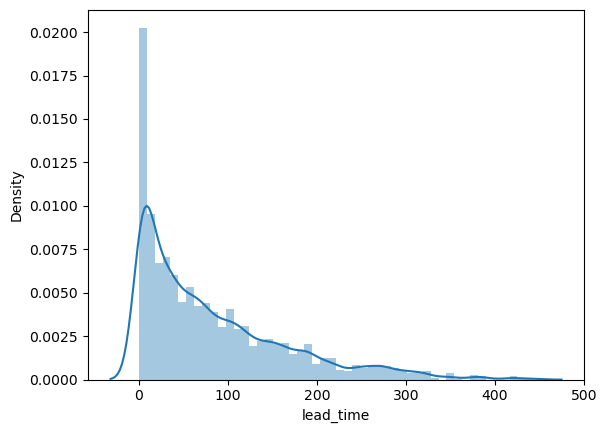

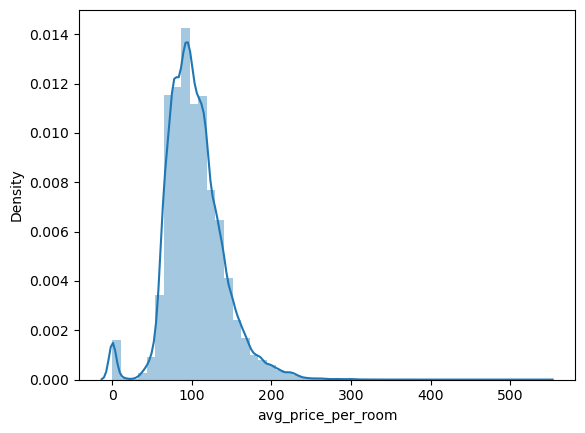

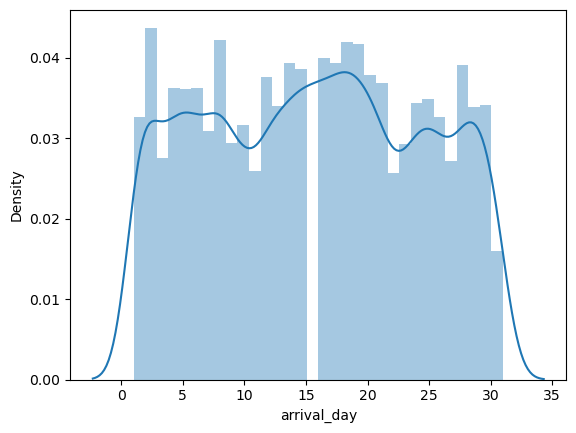

In [31]:
for i in num:
    sns.distplot(df[i])
    plt.show()

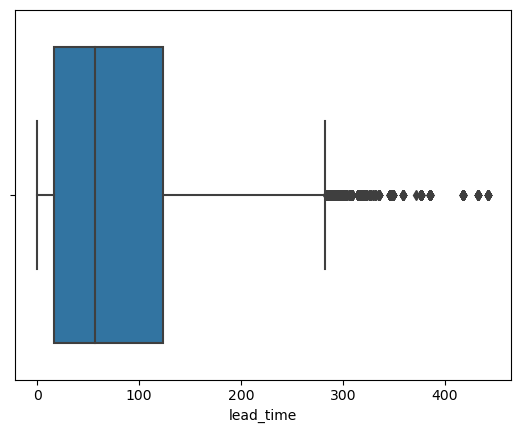

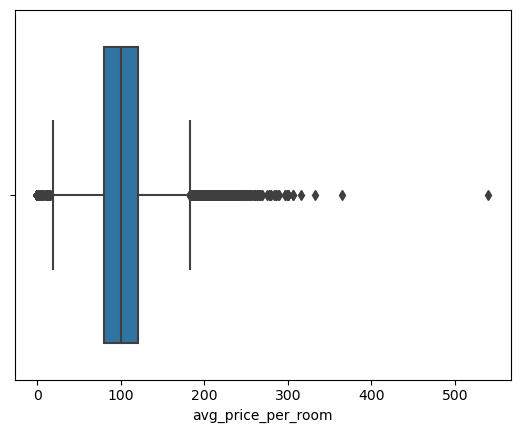

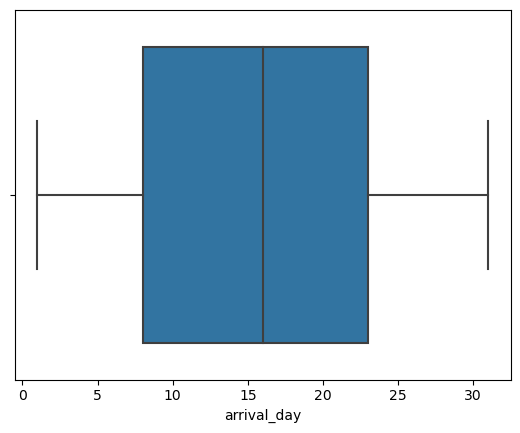

In [32]:
for i in num:
    sns.boxplot(x=df[i])
    plt.show()

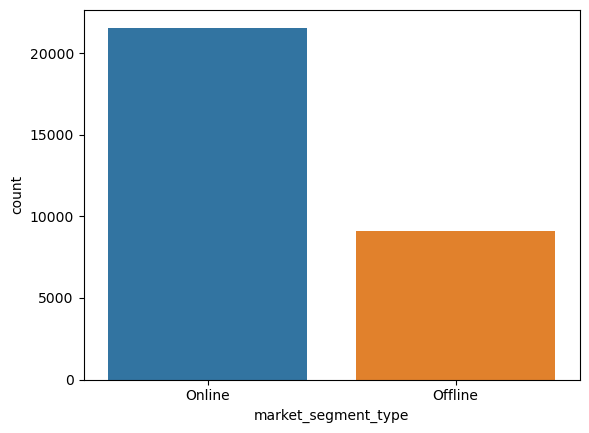

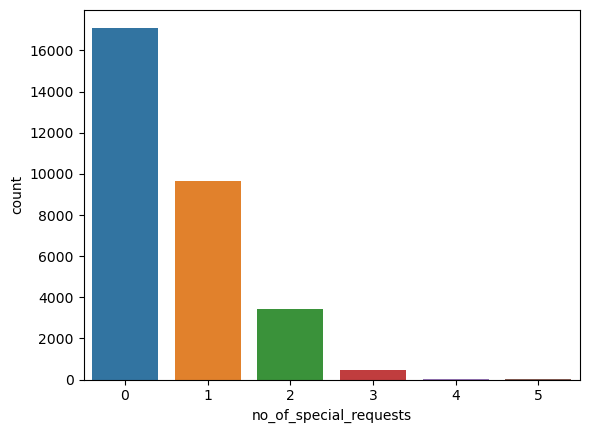

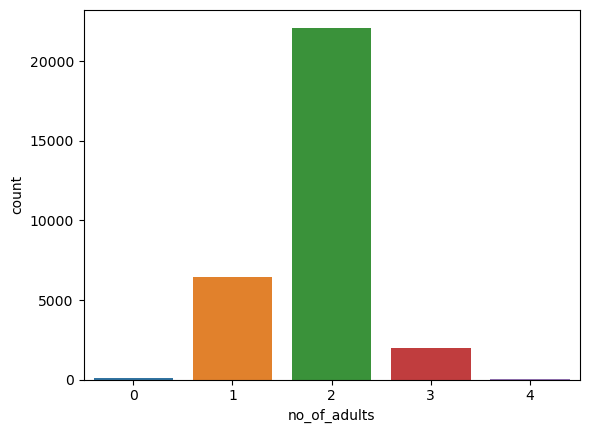

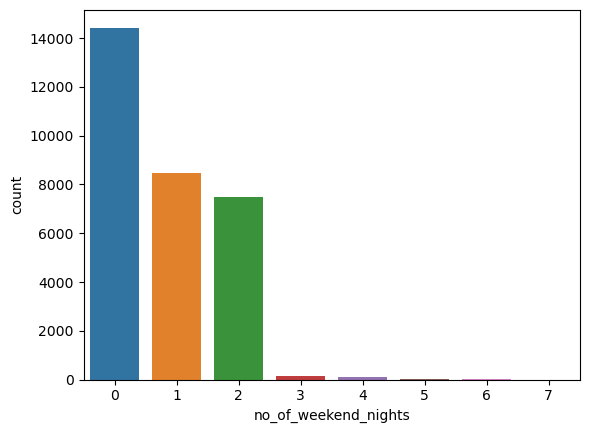

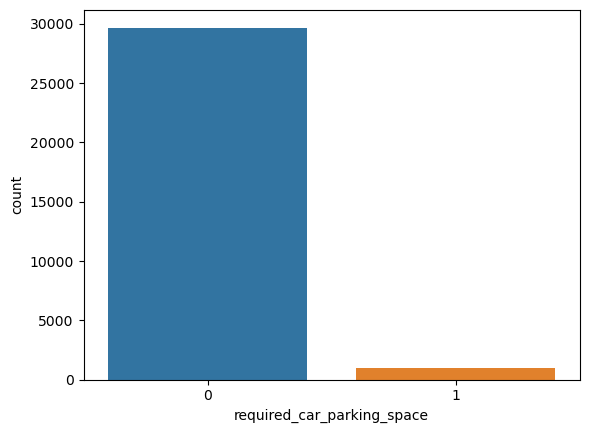

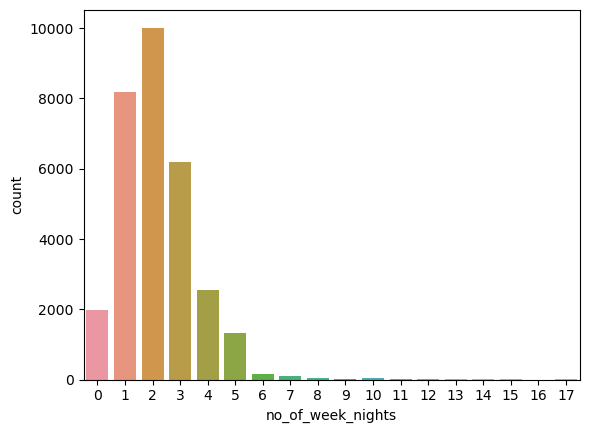

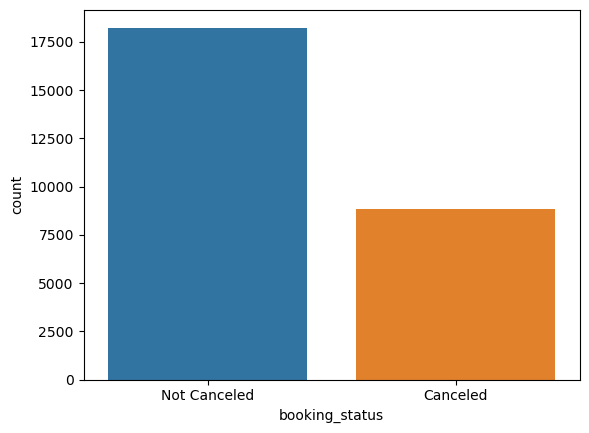

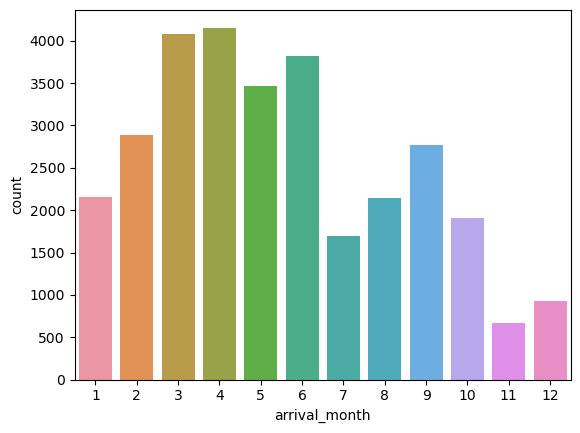

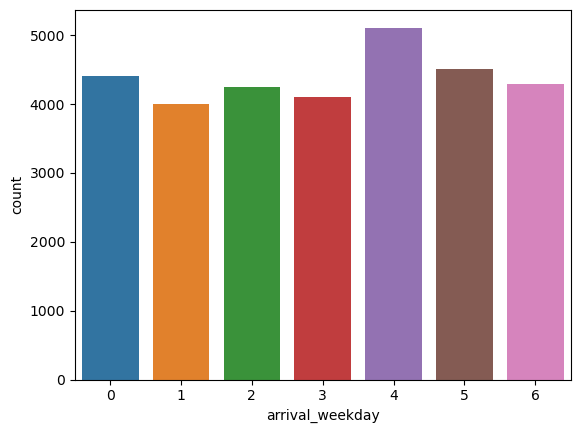

In [33]:
for i in cat:
    sns.countplot(x=df[i])
    plt.show()

Bivariate analysis

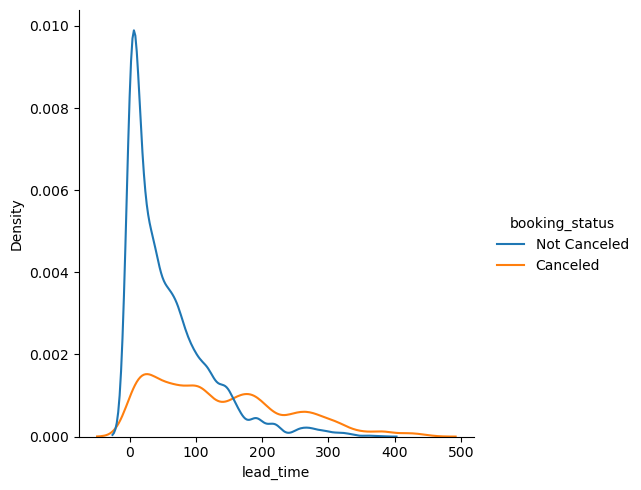

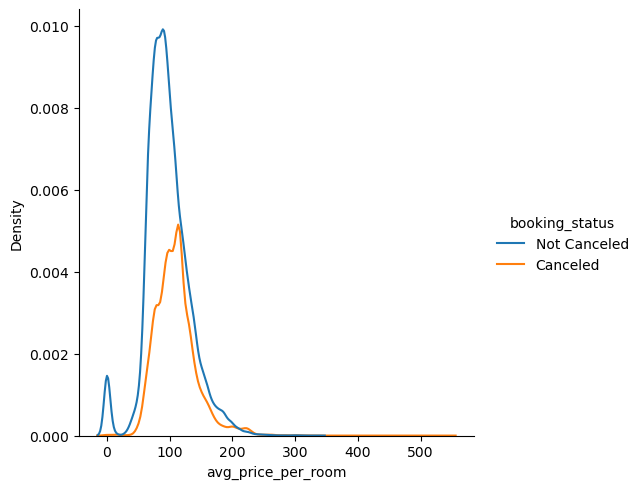

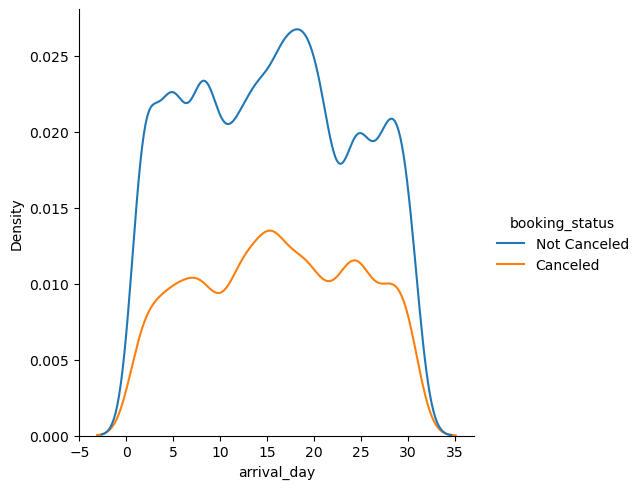

In [34]:
# Num vs Cat
for i in num:
    sns.displot(data=df,x=i,hue=df['booking_status'],kind='kde')
    plt.show()
    

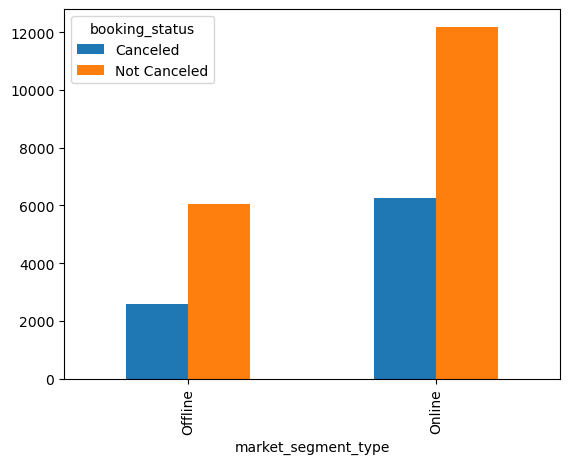

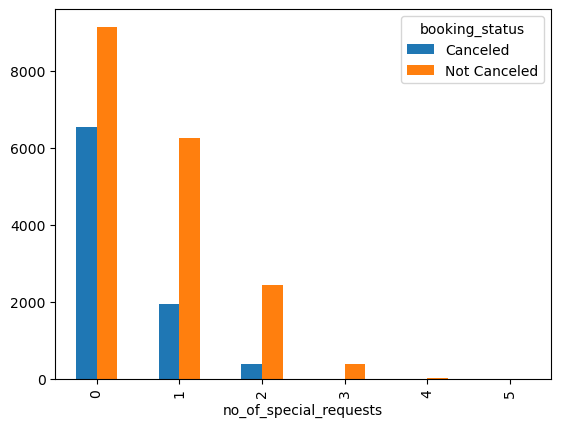

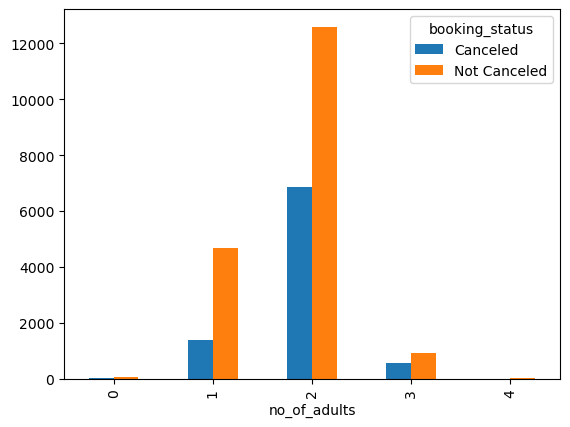

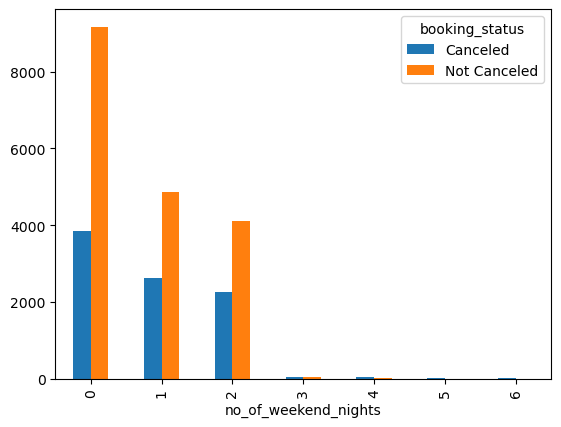

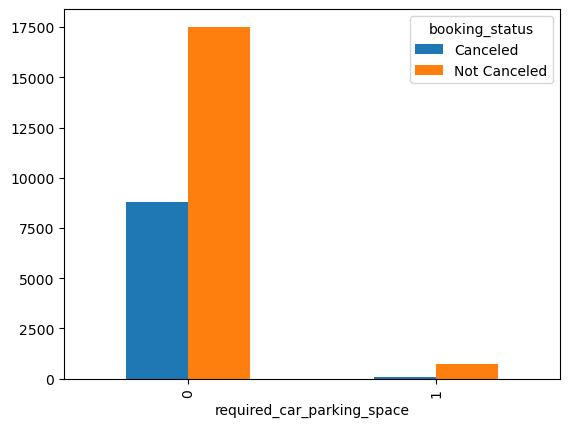

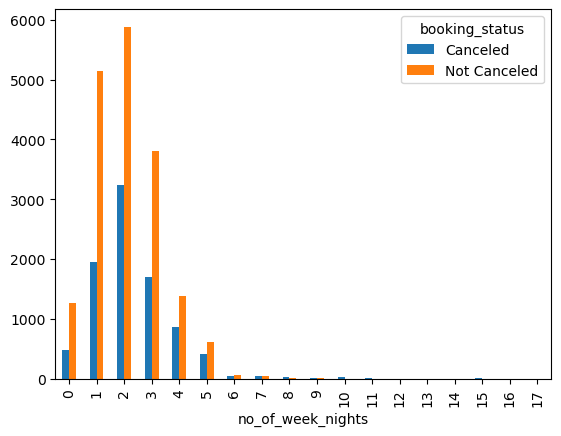

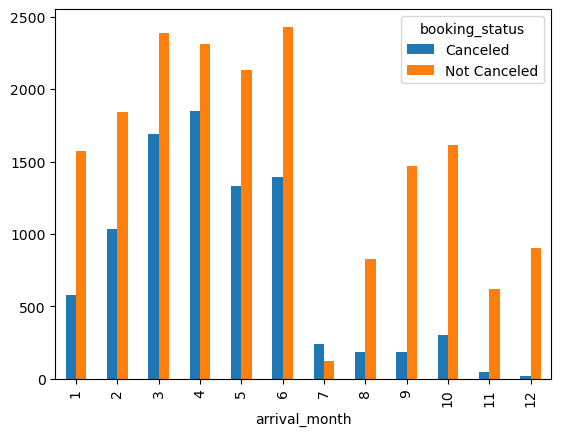

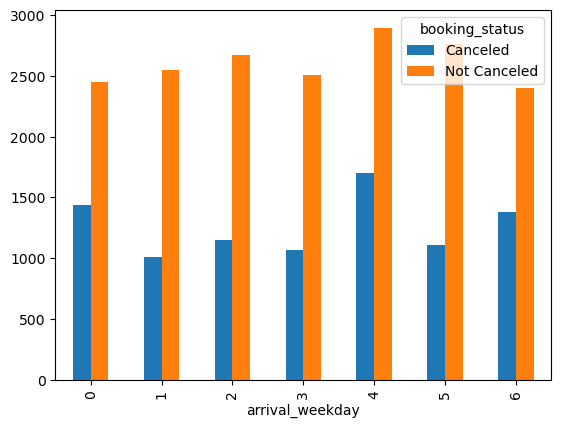

In [35]:
# Cat vs Cat
for i in cat:
    if i != 'booking_status':
        pd.crosstab(df[i],df['booking_status']).plot(kind='bar')
        plt.show()

# Missing values

In [36]:
df.isnull().sum()

lead_time                        0
market_segment_type              0
no_of_special_requests           0
avg_price_per_room               0
no_of_adults                     0
no_of_weekend_nights             0
required_car_parking_space       0
no_of_week_nights                0
booking_status                3583
arrival_day                      0
arrival_month                    0
arrival_weekday                  0
dtype: int64

In [37]:
df[df.duplicated()]

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
45,12,Offline,1,85.00,1,1,0,0,Not Canceled,1,1,4
60,12,Offline,1,85.00,1,1,0,0,Not Canceled,1,1,4
63,36,Online,0,110.00,1,2,0,3,Not Canceled,1,1,4
64,231,Online,1,100.30,2,2,0,2,Canceled,1,1,4
75,61,Online,1,149.40,2,2,0,3,Not Canceled,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,263,Online,0,100.30,2,2,0,4,NaN,29,9,3
3577,134,Online,2,137.70,2,1,0,3,NaN,29,9,3
3578,258,Online,1,106.20,2,0,0,1,NaN,29,9,3
3579,263,Online,0,100.30,2,2,0,4,NaN,29,9,3


In [38]:
df.shape

(30676, 12)

# Outlier Treatment

In [39]:
# to treat extreme outliers we use 2.5 whisker lengths
#for i in['lead_time','avg_price_per_room']:
    #q3,q1=np.quantile(df[i],[0.75,0.25])
    #iqr=q3-q1
    #ul,ll=q3+2.5*iqr,q1-2.5*iqr
    #df[i]=np.where((df[i]>ul),ul,df[i])
    #df[i]=np.where((df[i]<ll),ll,df[i])

In [40]:
#for i in ['lead_time','avg_price_per_room']:
    #sns.boxplot(x=df[i])
    #plt.show()

In [41]:
# We will treat outliers in train data only as it will lead to data leaking

# Encoding

In [42]:
df.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4
2,24,Online,1,71.69,2,2,0,0,Not Canceled,1,1,4
3,23,Online,0,84.70,1,2,0,0,Not Canceled,1,1,4
4,46,Online,1,149.40,2,2,0,3,Canceled,1,1,4


In [43]:
# Online 1 and Offline=0
df['market_segment_type']=df['market_segment_type'].map({'Online':1,'Offline':0})

In [44]:
# Canceled =1 and Not Canceled=0
df['booking_status']=df['booking_status'].map({'Not Canceled':0,'Canceled':1})

In [45]:
df.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,0,1,0,85.03,1,1,0,0,0.0,1,1,4
1,34,1,2,125.10,2,2,0,0,0.0,1,1,4
2,24,1,1,71.69,2,2,0,0,0.0,1,1,4
3,23,1,0,84.70,1,2,0,0,0.0,1,1,4
4,46,1,1,149.40,2,2,0,3,1.0,1,1,4


In [46]:
df['booking_status'].value_counts()

booking_status
0.0    18236
1.0     8857
Name: count, dtype: int64

# Train Test split

In [47]:
xtest=df[df['booking_status'].isnull()]

In [48]:
xtest.drop(columns=['booking_status'],inplace=True)

In [49]:
xtest.shape

(3583, 11)

In [50]:
ytest.shape

(3583,)

In [51]:
train=df[df['booking_status'].notnull()]

In [52]:
# lets drop duplicates from train
train.drop_duplicates(inplace=True)

In [53]:
train.shape

(18655, 12)

In [55]:
for i in['lead_time','avg_price_per_room']:
    q3,q1=np.quantile(train[i],[0.75,0.25])
    iqr=q3-q1
    ul,ll=q3+2.5*iqr,q1-2.5*iqr
    train[i]=np.where((train[i]>ul),ul,train[i])
    train[i]=np.where((train[i]<ll),ll,train[i])

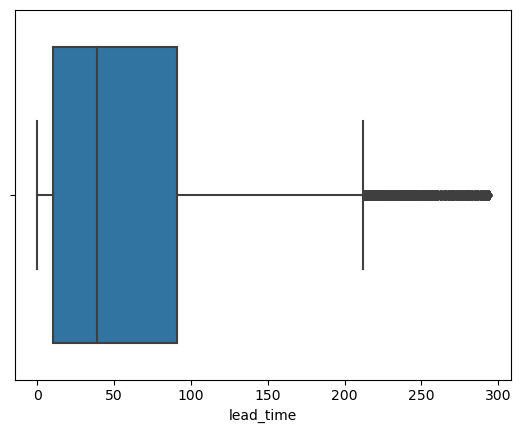

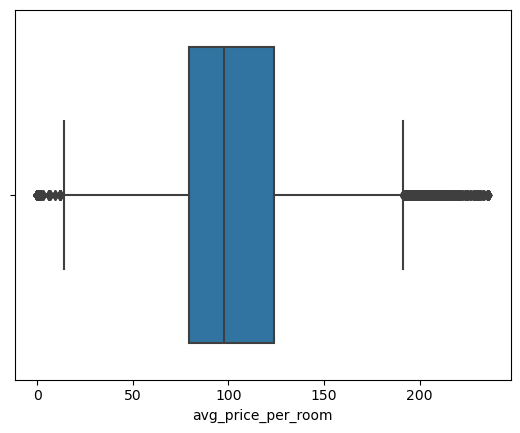

In [56]:
for i in ['lead_time','avg_price_per_room']:
    sns.boxplot(x=train[i])
    plt.show()

In [57]:
xtrain=train.drop(columns='booking_status')
ytrain=train['booking_status']

In [58]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(18655, 11) (18655,) (3583, 11) (3583,)


# Predictive Modelling

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

from sklearn.model_selection import GridSearchCV,cross_val_score

In [64]:
ytest=ytest.map({'Canceled':1,'Not Canceled':0})

In [82]:
mod=[]
acc=[]
pre=[]
rec=[]
f1=[]
ck=[]

def model_validation(model,x_train,y_train,x_test,y_test):
    m=model
    m.fit(x_train,y_train)
    hard=m.predict(x_test)
    soft=m.predict_proba(x_test)[:,1]
    
    print('classification report\n',classification_report(y_test,hard))
    fpr,tpr,thres=roc_curve(y_test,soft)
    plt.title(f'ROC AUC:{round(roc_auc_score(y_test,soft),3)}')
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.show()
    
    inp=input('Do you want to save the model in score card? Y/N')
    if inp.lower()=='y':
        global scorecard
        mod.append(str(model))
        acc.append(accuracy_score(y_test,hard))
        pre.append(precision_score(y_test,hard))
        rec.append(recall_score(y_test,hard))
        f1.append(f1_score(y_test,hard))
        ck.append(cohen_kappa_score(y_test,hard))
        scorecard=pd.DataFrame({'Model':mod,'Accuracy':acc,'Precision':pre,'Recall':rec,'f1 score':f1,'Cohen kappa':ck})
    else:
        return

# Logistic Regression

classification report
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      2383
           1       0.75      0.52      0.61      1200

    accuracy                           0.78      3583
   macro avg       0.77      0.72      0.73      3583
weighted avg       0.78      0.78      0.77      3583



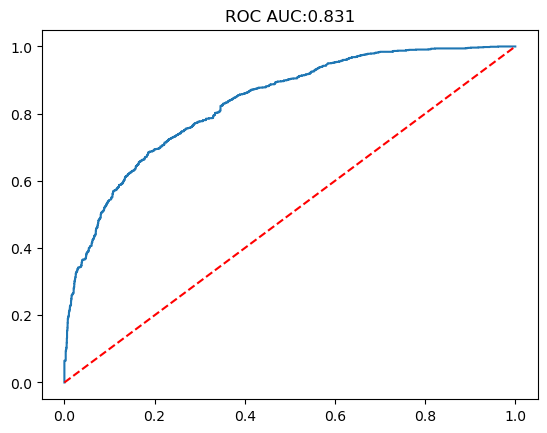

Do you want to save the model in score card? Y/Ny


In [83]:
model_validation(LogisticRegression(),xtrain,ytrain,xtest,ytest)

In [84]:
scorecard

,Model,Accuracy,Precision,Recall,f1 score,Cohen kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168


# Decision Tree

In [91]:
gsv=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'max_depth':[4,5,6,7,8]},cv=5,scoring='f1')

In [92]:
gsv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8]}, scoring='f1')

In [93]:
gsv.best_params_

{'max_depth': 7}

In [94]:
gsv.best_score_

0.5760469993657079

classification report
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      2383
           1       0.71      0.69      0.70      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.77      0.78      3583
weighted avg       0.80      0.80      0.80      3583



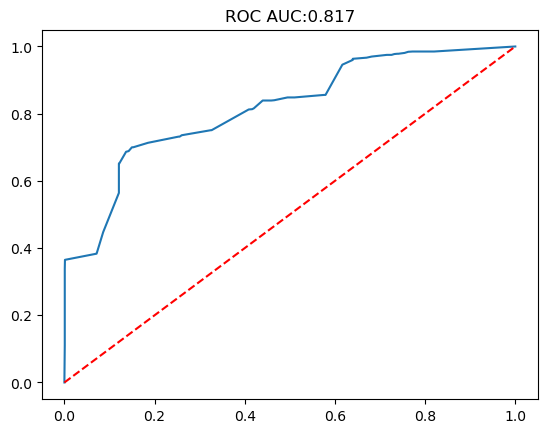

Do you want to save the model in score card? Y/Ny


In [95]:
model_validation(DecisionTreeClassifier(**gsv.best_params_),xtrain,ytrain,xtest,ytest)

In [96]:
scorecard

,Model,Accuracy,Precision,Recall,f1 score,Cohen kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595


# Random forest

classification report
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      2383
           1       0.85      0.67      0.75      1200

    accuracy                           0.85      3583
   macro avg       0.85      0.80      0.82      3583
weighted avg       0.85      0.85      0.84      3583



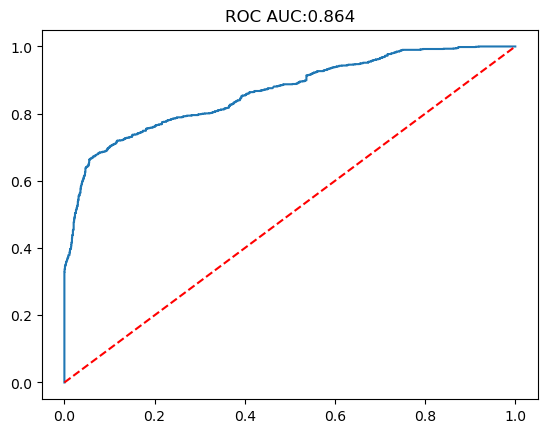

Do you want to save the model in score card? Y/Ny


In [99]:
model_validation(RandomForestClassifier(max_depth=8,n_estimators=100),xtrain,ytrain,xtest,ytest)

In [100]:
scorecard

,Model,Accuracy,Precision,Recall,f1 score,Cohen kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.848730,0.848517,0.667500,0.747201,0.641459


# Ada boosting

classification report
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      2383
           1       0.62      0.79      0.69      1200

    accuracy                           0.77      3583
   macro avg       0.75      0.77      0.75      3583
weighted avg       0.79      0.77      0.77      3583



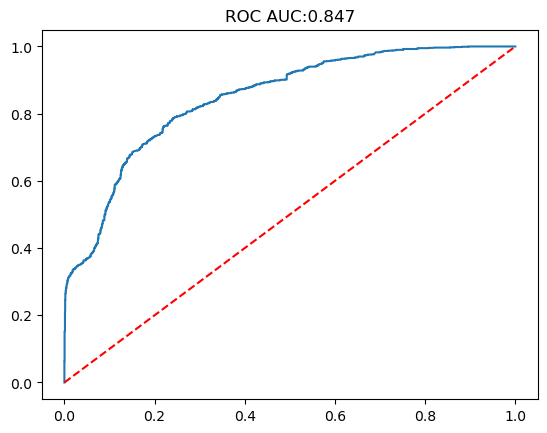

Do you want to save the model in score card? Y/Ny


In [102]:
model_validation(AdaBoostClassifier(n_estimators=120,learning_rate=0.5),xtrain,ytrain,xtest,ytest)

In [103]:
scorecard

,Model,Accuracy,Precision,Recall,f1 score,Cohen kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.848730,0.848517,0.667500,0.747201,0.641459
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616


classification report
               precision    recall  f1-score   support

           0       0.87      0.77      0.82      2383
           1       0.63      0.77      0.69      1200

    accuracy                           0.77      3583
   macro avg       0.75      0.77      0.76      3583
weighted avg       0.79      0.77      0.78      3583



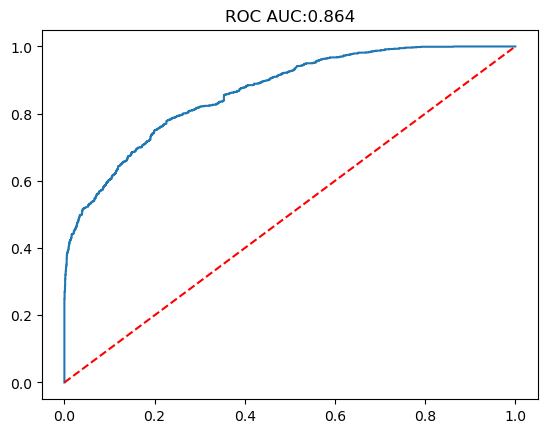

Do you want to save the model in score card? Y/Ny


In [106]:
model_validation(GradientBoostingClassifier(max_depth=6,n_estimators=150),xtrain,ytrain,xtest,ytest)

In [107]:
scorecard

,Model,Accuracy,Precision,Recall,f1 score,Cohen kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.848730,0.848517,0.667500,0.747201,0.641459
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.772816,0.631831,0.770833,0.694444,0.516446


# XG boost

classification report
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      2383
           1       0.61      0.80      0.69      1200

    accuracy                           0.76      3583
   macro avg       0.74      0.77      0.75      3583
weighted avg       0.79      0.76      0.77      3583



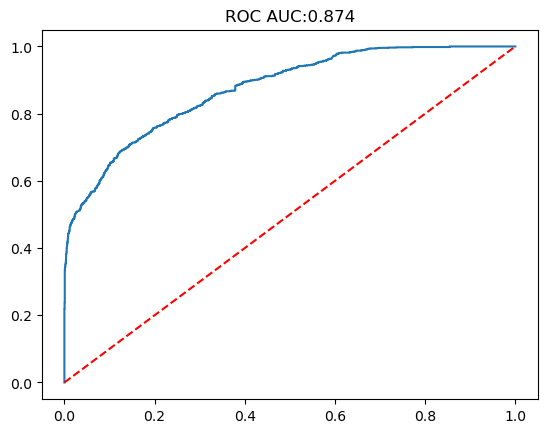

Do you want to save the model in score card? Y/Ny


In [108]:
model_validation(XGBClassifier(n_estimators=120,max_depth=4),xtrain,ytrain,xtest,ytest)

In [109]:
scorecard

,Model,Accuracy,Precision,Recall,f1 score,Cohen kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.848730,0.848517,0.667500,0.747201,0.641459
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.772816,0.631831,0.770833,0.694444,0.516446
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222


# Voting

In [110]:
base_learners=[('DT_4',DecisionTreeClassifier(max_depth=4)),
               ('RF',RandomForestClassifier(n_estimators=120,max_depth=5)),
               ('DT_6',DecisionTreeClassifier(max_depth=6)),
               ('XGB',XGBClassifier(max_depth=4,n_estimators=100))]







classification report
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      2383
           1       0.75      0.69      0.72      1200

    accuracy                           0.82      3583
   macro avg       0.80      0.79      0.79      3583
weighted avg       0.82      0.82      0.82      3583



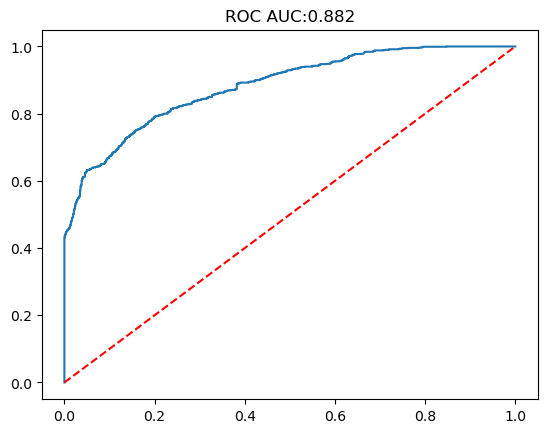

Do you want to save the model in score card? Y/Ny


In [111]:
model_validation(VotingClassifier(estimators=base_learners,voting='soft'),xtrain,ytrain,xtest,ytest)

In [112]:
scorecard

,Model,Accuracy,Precision,Recall,f1 score,Cohen kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.848730,0.848517,0.667500,0.747201,0.641459
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.772816,0.631831,0.770833,0.694444,0.516446
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.820262,0.754113,0.687500,0.719268,0.587498


# Stacking

classification report
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      2383
           1       0.86      0.55      0.67      1200

    accuracy                           0.82      3583
   macro avg       0.83      0.75      0.77      3583
weighted avg       0.82      0.82      0.80      3583



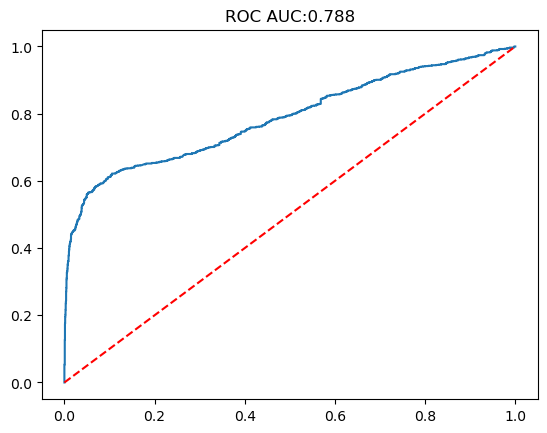

Do you want to save the model in score card? Y/Ny


In [113]:
model_validation(StackingClassifier(estimators=base_learners),xtrain,ytrain,xtest,ytest)

In [114]:
scorecard

,Model,Accuracy,Precision,Recall,f1 score,Cohen kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.848730,0.848517,0.667500,0.747201,0.641459
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.772816,0.631831,0.770833,0.694444,0.516446
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.820262,0.754113,0.687500,0.719268,0.587498
7,"StackingClassifier(estimators=[('DT_4', Decisi...",0.817471,0.857330,0.545833,0.667006,0.549664


In [115]:
param={'n_estimators':[70,100,120,150,100],
      'learning_rate':[1,0.5,0.1,0.01],
      'max_depth':[3,4,5,6,7,8,9,11]}

In [116]:
gsv=GridSearchCV(estimator=XGBClassifier(),param_grid=param,scoring='f1',verbose=1)

In [117]:
gsv.fit(xtrain,ytrain)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [1, 0.5, 0.1, 0.01],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 11],
                         'n_estimators': [70, 100, 120, 150, 100]},
             scoring='f1', verbose=1)

In [118]:
gsv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 70}

classification report
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      2383
           1       0.73      0.75      0.74      1200

    accuracy                           0.82      3583
   macro avg       0.80      0.80      0.80      3583
weighted avg       0.82      0.82      0.82      3583



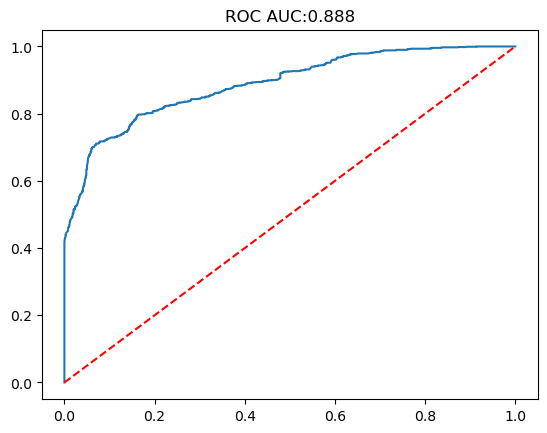

Do you want to save the model in score card? Y/Ny


In [119]:
model_validation(XGBClassifier(**gsv.best_params_),xtrain,ytrain,xtest,ytest)

In [120]:
scorecard

,Model,Accuracy,Precision,Recall,f1 score,Cohen kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.848730,0.848517,0.667500,0.747201,0.641459
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.772816,0.631831,0.770833,0.694444,0.516446
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.820262,0.754113,0.687500,0.719268,0.587498
7,"StackingClassifier(estimators=[('DT_4', Decisi...",0.817471,0.857330,0.545833,0.667006,0.549664
8,"XGBClassifier(base_score=None, booster=None, c...",0.823053,0.730832,0.746667,0.738664,0.604932


# Final Model

In [121]:
final_model=XGBClassifier(**gsv.best_params_)
final_model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=70, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Deployment

In [122]:
# Prediction

In [123]:
xtest.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_day,arrival_month,arrival_weekday
0,4,1,1,103.0,1,0,1,1,1,7,4
1,147,1,2,103.7,2,2,0,2,1,7,4


In [124]:
final_model.predict_proba([[10,1,0,170,2,2,1,1,12,4,4]])[:,1][0]

0.14452223

In [125]:
import pickle
with open('final_model.pkl','wb') as file:
    pickle.dump(final_model,file)
    